# T81-558: Applications of Deep Neural Networks
**Class 13: Advanced/Other Topics**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), School of Engineering and Applied Science, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

Tonight I will cover several advanced features of TensorFlow.  This is mostly a collection of additional topics that did not fit nicely into other sections of the course.  Topics include:

* Multi-Output Regression
* Autoencoders
* Python Image Handling
* Image Autoencoders
* Denoising Autoencoders

# Multi-Output Regression



In [1]:
import tensorflow.contrib.learn as skflow
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import display, HTML  

# Create random dataset.
rng = np.random.RandomState(1)
x = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(x).ravel(), np.pi * np.cos(x).ravel()]).T

# Fit regression DNN model.
regressor = skflow.TensorFlowDNNRegressor(hidden_units=[5, 5])
regressor.fit(x, y)
pred = regressor.predict(x)
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Score (RMSE): {}".format(score))

np.set_printoptions(suppress=True)
display(pd.DataFrame(pred[0:5,:]))


Step #100, epoch #25, avg. train loss: 18.40228
Step #200, epoch #50, avg. train loss: 4.85599
Score (RMSE): 2.199724934776313


0         1
0 -0.044432 -0.383456
1 -0.044432 -0.383456
2 -0.044432 -0.383456
3 -0.044432 -0.383456
4 -0.044432 -0.383456

# Simple Auto Encoder

In [2]:
import tensorflow.contrib.learn as skflow
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import display, HTML 

x = np.array([range(10)]).astype(np.float32)
print(x.shape)
# Fit regression DNN model.
regressor = skflow.TensorFlowDNNRegressor(hidden_units=[2],steps=1000)
regressor.fit(x, x)
pred = regressor.predict(x)
score = np.sqrt(metrics.mean_squared_error(pred,x))
print("Fold score (RMSE): {}".format(score))
np.set_printoptions(suppress=True)
print(pred)

(1, 10)
Step #100, epoch #100, avg. train loss: 11.99353
Step #200, epoch #200, avg. train loss: 0.12317
Step #300, epoch #300, avg. train loss: 0.06508
Step #400, epoch #400, avg. train loss: 0.04326
Step #500, epoch #500, avg. train loss: 0.03205
Step #600, epoch #600, avg. train loss: 0.02539
Step #700, epoch #700, avg. train loss: 0.02106
Step #800, epoch #800, avg. train loss: 0.01809
Step #900, epoch #900, avg. train loss: 0.00480
Step #1000, epoch #1000, avg. train loss: 0.00001
Fold score (RMSE): 9.65685467235744e-05
[[ 0.00005329  1.00005126  1.99995553  2.99992466  3.99993491  4.99990416
   5.99988127  6.99986935  7.99986982  8.99986362]]


# Reading Images in Python

```
pip install pillow
```

[[[ 86 133 177]
  [ 85 132 176]
  [ 84 133 176]
  ..., 
  [ 94 128 153]
  [ 91 128 155]
  [ 94 129 169]]

 [[ 86 133 177]
  [ 88 135 179]
  [ 88 137 180]
  ..., 
  [ 96 133 159]
  [ 92 136 165]
  [ 99 141 183]]

 [[ 83 130 174]
  [ 87 134 178]
  [ 89 138 181]
  ..., 
  [108 150 175]
  [100 149 179]
  [ 97 144 186]]

 ..., 
 [[127  77  76]
  [131  81  80]
  [128  80  76]
  ..., 
  [  4  10  10]
  [  2  11  10]
  [  2  11  10]]

 [[132  81  77]
  [129  80  75]
  [124  75  70]
  ..., 
  [  4  10  10]
  [  3  12  11]
  [  3  12  11]]

 [[140  90  83]
  [137  87  80]
  [130  81  74]
  ..., 
  [ 11  17  17]
  [ 10  19  18]
  [ 10  19  18]]]


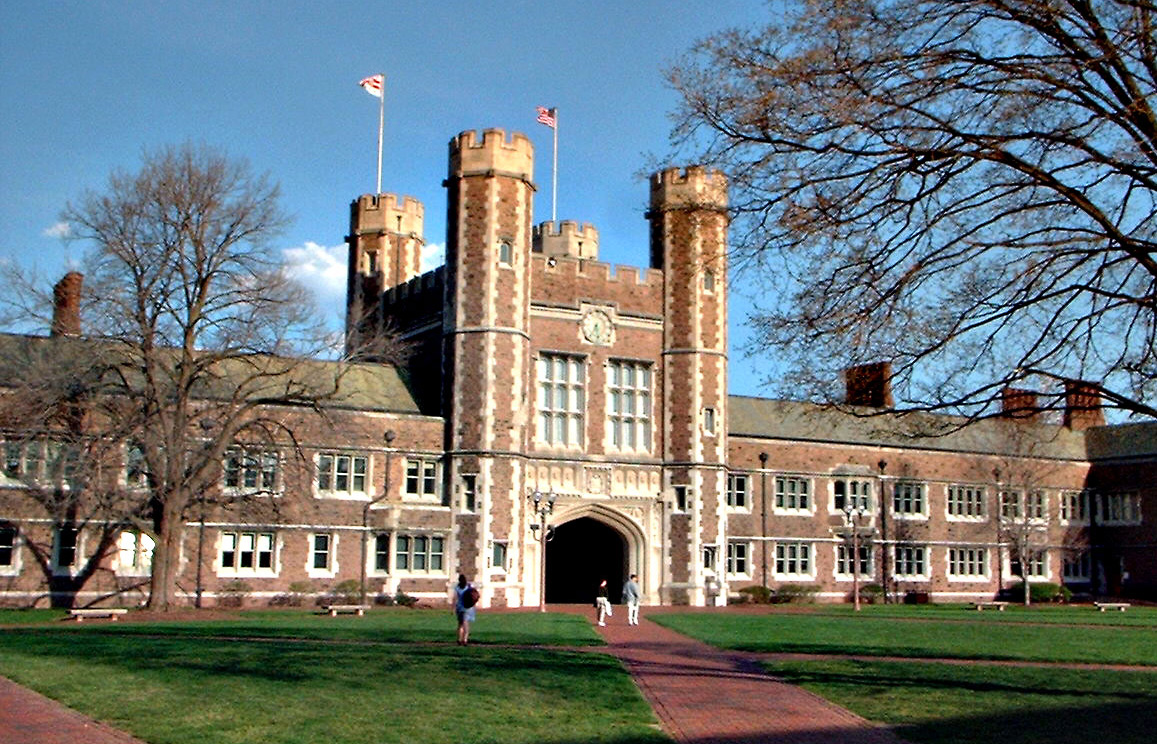

In [4]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

ImageFile.LOAD_TRUNCATED_IMAGES = False
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()
#img = Image.open("./data/brookings.jpg")
#img.load()

print(np.asarray(img))

img
#imshow(np.asarray(img))
#display(img)

# Creating Images (from pixels) in Python




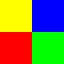

In [5]:
from PIL import Image
import numpy as np

w, h = 64, 64
data = np.zeros((h, w, 3), dtype=np.uint8)

# Yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
# Red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
# Green
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0]        
        
# Blue
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]                
        

img = Image.fromarray(data, 'RGB')
img

# Transform Images in Python (at the pixel level)

Rows: 744, Cols: 1157


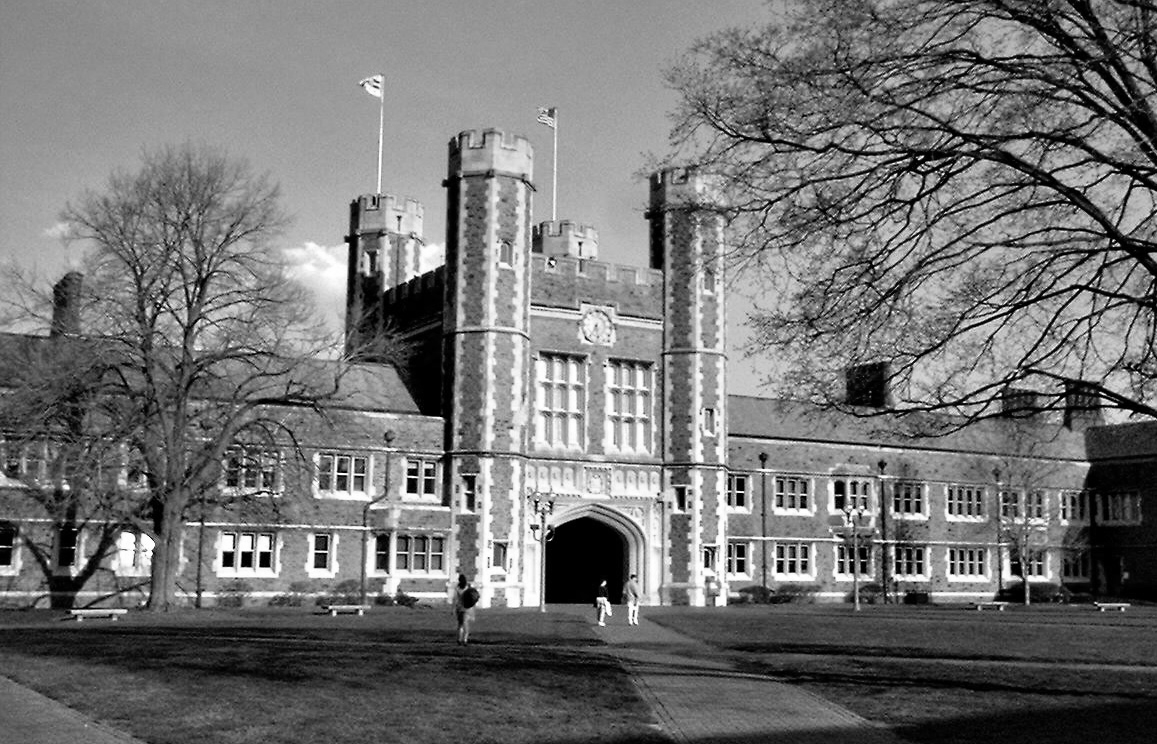

In [30]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = np.zeros((rows, cols, 3), dtype=np.uint8)
for row in range(rows):
    for col in range(cols):
        t = np.mean(img_array[row,col])
        img2_array[row,col] = [t,t,t]

img2 = Image.fromarray(img2_array, 'RGB')
img2        
        

# Auto Encode (single image)

(1, 49152)
Step #100, epoch #100, avg. train loss: 13563047444480.00000
Step #200, epoch #200, avg. train loss: 332517664.00000
Step #300, epoch #300, avg. train loss: 285478208.00000
Step #400, epoch #400, avg. train loss: 243173360.00000
Step #500, epoch #500, avg. train loss: 205272208.00000
Step #600, epoch #600, avg. train loss: 171512592.00000
Step #700, epoch #700, avg. train loss: 141653296.00000
Step #800, epoch #800, avg. train loss: 115460200.00000
Step #900, epoch #900, avg. train loss: 92698776.00000
Step #1000, epoch #1000, avg. train loss: 73131344.00000
Score neural network


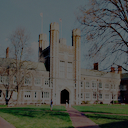

In [30]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
    
x = []    
y = []
    
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()
img = img.resize((128,128), Image.ANTIALIAS)
img_array = np.asarray(img)
img_array = img_array.flatten()
img_array = np.array([ img_array ])
img_array = img_array.astype(np.float32)
print(img_array.shape)


regressor = skflow.TensorFlowDNNRegressor(hidden_units=[500], optimizer='Adam', learning_rate=0.1,steps=1000)
regressor.fit(img_array, img_array)

print("Score neural network")
pred = regressor.predict(img_array)
cols,rows = img.size
img_array2 = pred[0].reshape(rows,cols,3)
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')
img2   

# Standardize Images

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


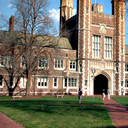

https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG


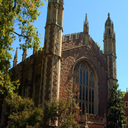

https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg


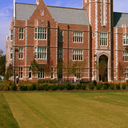

https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg


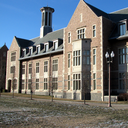

https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg


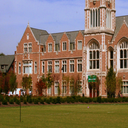

https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg


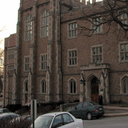

https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg


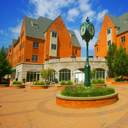

(7, 49152)


In [6]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

images = [
    "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg"    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)


# Image Auto Encoder (multi-image)

Creating neural network
Step #100, epoch #100, avg. train loss: 31165.41992
Step #200, epoch #200, avg. train loss: 29133.80273
Step #300, epoch #300, avg. train loss: 25430.59766
Step #400, epoch #400, avg. train loss: 21435.06250
Step #500, epoch #500, avg. train loss: 17864.50195
Step #600, epoch #600, avg. train loss: 14544.54004
Step #700, epoch #700, avg. train loss: 12230.18262
Step #800, epoch #800, avg. train loss: 10316.72363
Step #900, epoch #900, avg. train loss: 8736.15820
Step #1000, epoch #1000, avg. train loss: 7390.71875
Step #1100, epoch #1100, avg. train loss: 6237.15381
Step #1200, epoch #1200, avg. train loss: 5277.75439
Step #1300, epoch #1300, avg. train loss: 4497.34619
Step #1400, epoch #1400, avg. train loss: 3931.61060
Step #1500, epoch #1500, avg. train loss: 3420.82275
Step #1600, epoch #1600, avg. train loss: 2998.92725
Step #1700, epoch #1700, avg. train loss: 2754.69287
Step #1800, epoch #1800, avg. train loss: 2526.59229
Step #1900, epoch #1900, avg. tr

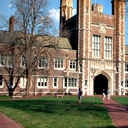

[ 0.13313915  0.04670525 -0.97337675 ..., -0.61865389 -0.7790556
 -0.88738412]


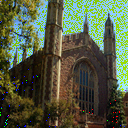

[-0.15952991  0.0626969   0.80419445 ...,  0.15286374 -0.1485671
 -0.64234269]


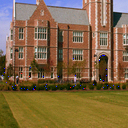

[-0.4065994   0.08580926  0.65725195 ..., -0.12289405 -0.22702311
 -0.34458077]


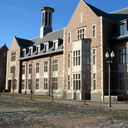

[ 0.28956115  0.37904575  0.78896832 ..., -0.20842004 -0.2652061
 -0.82918143]


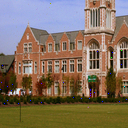

[ 0.9699626   0.99242747  0.98758626 ..., -0.1789254  -0.2024432
 -0.20731574]


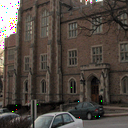

[-0.78945625 -0.38816476  0.53527308 ...,  0.6437577   0.19896068
 -0.35761943]


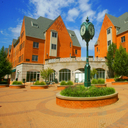

In [13]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import tensorflow.contrib.learn as skflow
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 

# Fit regression DNN model.
print("Creating neural network")
regressor = skflow.TensorFlowDNNRegressor(hidden_units=[100,50,25] ,
    optimizer='Adam', steps=7000, learning_rate = 0.0001)
regressor.fit(x, x)
print("Score neural network")
pred = regressor.predict(x)
#score = np.sqrt(metrics.mean_squared_error(pred,y))
#print("Score (RMSE): {}".format(score))


cols,rows = img.size
for i in range(pred.shape[0]):
    print(pred[i])
    img_array2 = pred[i].reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    display(img2)   

# Adding Noise to an Image

Rows: 744, Cols: 1157


/Users/jeff/anaconda/envs/wustl/lib/python3.4/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


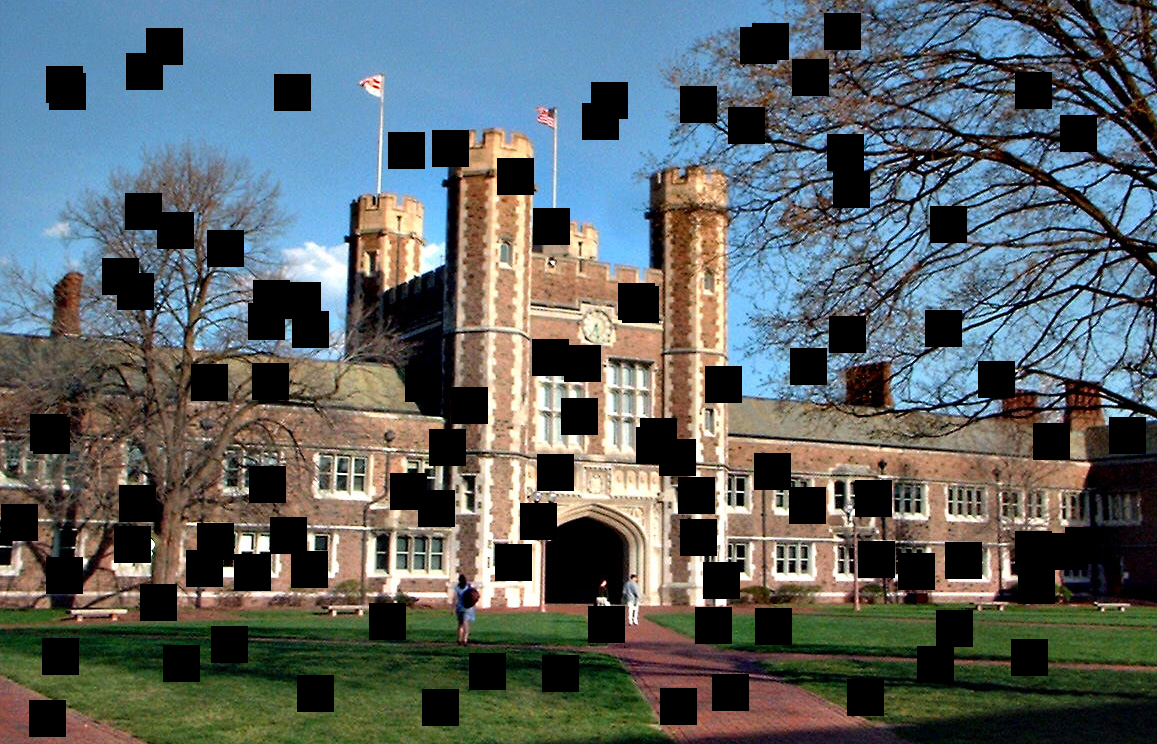

In [35]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = min(rows,cols)/20 # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2        
        

# Denoising Autoencoder

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


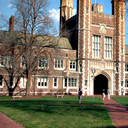

/Users/jeff/anaconda/envs/wustl/lib/python3.4/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG


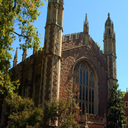

https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg


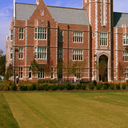

https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg


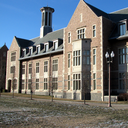

https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg


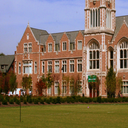

https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg


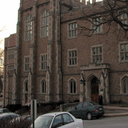

https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg


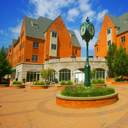

(70, 49152)
(70, 49152)


In [47]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

images = [
    "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg"    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = []    
y = []
loaded_images = []
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    
    loaded_images.append(img)
    print(url)
    display(img)
    for i in range(10):
        img_array = np.asarray(img)
        img_array_noise = add_noise(img_array)
        
        img_array = img_array.flatten()
        img_array = img_array.astype(np.float32)
        img_array = (img_array-128)/128
        
        img_array_noise = img_array_noise.flatten()
        img_array_noise = img_array_noise.astype(np.float32)
        img_array_noise = (img_array_noise-128)/128
        
        x.append(img_array_noise)
        y.append(img_array)
    
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)


In [43]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import tensorflow.contrib.learn as skflow
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML 

# Fit regression DNN model.
print("Creating neural network")
regressor = skflow.TensorFlowDNNRegressor(hidden_units=[200,100,50,100,200] ,
    optimizer='Adam', steps=3400, learning_rate = 0.0001)
regressor.fit(x, y)
print("Score neural network")
pred = regressor.predict(x)
#score = np.sqrt(metrics.mean_squared_error(pred,y))
#print("Score (RMSE): {}".format(score))


Creating neural network
Step #100, epoch #33, avg. train loss: 22572.64062
Step #200, epoch #66, avg. train loss: 5806.08008
Step #300, epoch #100, avg. train loss: 4342.36035
Step #400, epoch #133, avg. train loss: 4283.89355
Step #500, epoch #166, avg. train loss: 4286.56543
Step #600, epoch #200, avg. train loss: 4230.10449
Step #700, epoch #233, avg. train loss: 4147.26953
Step #800, epoch #266, avg. train loss: 3849.54663
Step #900, epoch #300, avg. train loss: 3281.33960
Step #1000, epoch #333, avg. train loss: 2592.52319
Step #1100, epoch #366, avg. train loss: 1973.72119
Step #1200, epoch #400, avg. train loss: 1438.93787
Step #1300, epoch #433, avg. train loss: 1093.66809
Step #1400, epoch #466, avg. train loss: 871.43219
Step #1500, epoch #500, avg. train loss: 713.60583
Step #1600, epoch #533, avg. train loss: 607.50525
Step #1700, epoch #566, avg. train loss: 480.23825
Step #1800, epoch #600, avg. train loss: 419.63773
Step #1900, epoch #633, avg. train loss: 323.89130
Step

*** Trial 1
With noise:


/Users/jeff/anaconda/envs/wustl/lib/python3.4/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


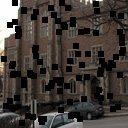

After auto encode noise removal


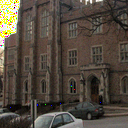

*** Trial 2
With noise:


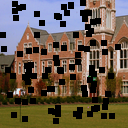

After auto encode noise removal


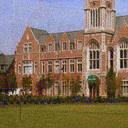

*** Trial 3
With noise:


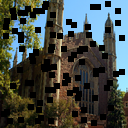

After auto encode noise removal


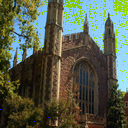

*** Trial 4
With noise:


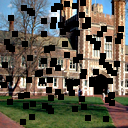

After auto encode noise removal


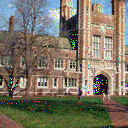

*** Trial 5
With noise:


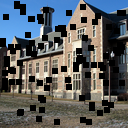

After auto encode noise removal


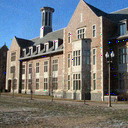

*** Trial 6
With noise:


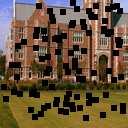

After auto encode noise removal


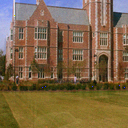

*** Trial 7
With noise:


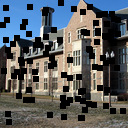

After auto encode noise removal


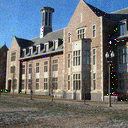

*** Trial 8
With noise:


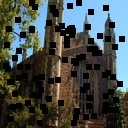

After auto encode noise removal


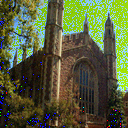

*** Trial 9
With noise:


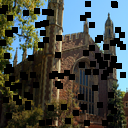

After auto encode noise removal


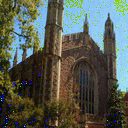

*** Trial 10
With noise:


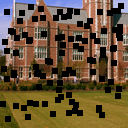

After auto encode noise removal


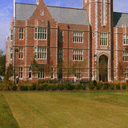

In [58]:
for z in range(10):
    print("*** Trial {}".format(z+1))
    
    # Choose random image
    i = np.random.randint(len(loaded_images))
    img = loaded_images[i]
    img_array = np.asarray(img)
    cols, rows = img.size

    # Add noise
    img_array_noise = add_noise(img_array)    

    #Display noisy image
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2, 'RGB')
    print("With noise:")
    display(img2)

    # Present noisy image to auto encoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    pred = regressor.predict(img_array_noise)[0]

    # Display neural result
    img_array2 = pred.reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    print("After auto encode noise removal")
    display(img2)

# TSNE


An interactive shell.

This file is designed to be launched as a PYTHONSTARTUP script.

Computing PCA projection
Computing t-SNE embedding


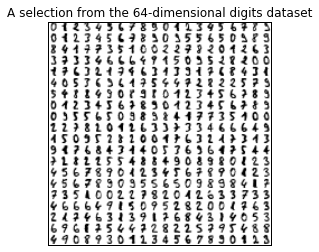

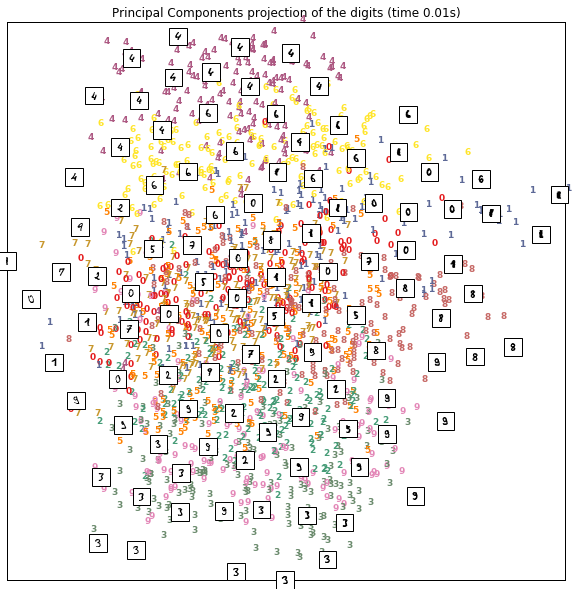

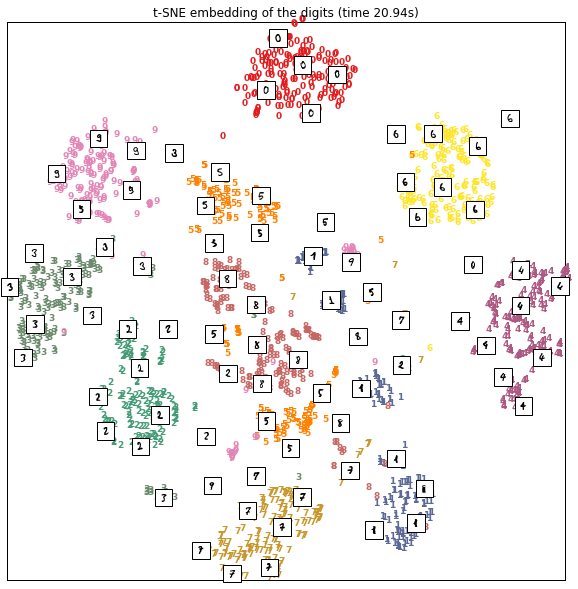

In [11]:
%matplotlib inline
# Based on code by: 
#          Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

# Other Topics

### Using TensorFlow Directly

### Reinforcement Learning
